In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prospect.models import priors_beta as pb
from prospect.models import transforms as ts
import lbg_forecast.population_model as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.cosmology as cosmo
import astropy.units as u
from astropy.cosmology import z_at_value


Text(0.5, 0, '$t_{L}/t_{\\mathrm{univ}}$')

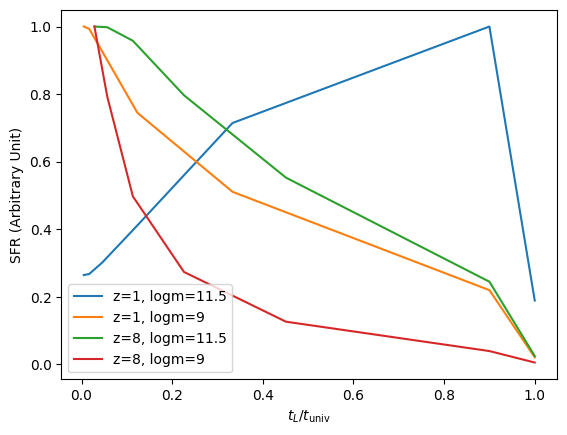

In [2]:
def get_sfr_curve(redshift, logmass):

    sigma = 0.000000000001
    agebins = sfh.default_agebins()

    logsfrratios = pop.prospector_beta_sfh_prior(100, redshift, logmass, sigma)[0, :]

    agebins_pbeta = ts.zred_to_agebins_pbeta(np.array([redshift]), agebins)
    sfrs = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_pbeta)
    lookback_time = (10**agebins_pbeta[:, 1])/1e9
    tuniv = cosmo.get_wmap9().age(redshift)

    return lookback_time/tuniv, sfrs


redshift = 1
logmass = 11.5
x1, y1 = get_sfr_curve(redshift, logmass)

redshift = 6
logmass = 11.5
x2, y2 = get_sfr_curve(redshift, logmass)

redshift = 1
logmass = 9
x3, y3 = get_sfr_curve(redshift, logmass)

redshift = 6
logmass = 9
x4, y4 = get_sfr_curve(redshift, logmass)

plt.plot(x1.value, y1/np.max(y1), label="z=1, logm=11.5")
plt.plot(x3.value, y3/np.max(y3), label="z=1, logm=9")
plt.plot(x2.value, y2/np.max(y2), label="z=8, logm=11.5")
plt.plot(x4.value, y4/np.max(y4), label="z=8, logm=9")
plt.legend()

plt.ylabel("SFR (Arbitrary Unit)")
plt.xlabel("$t_{L}/t_{\mathrm{univ}}$")

Text(0, 0.5, 'SFR/M (yr$^{-1}$)')

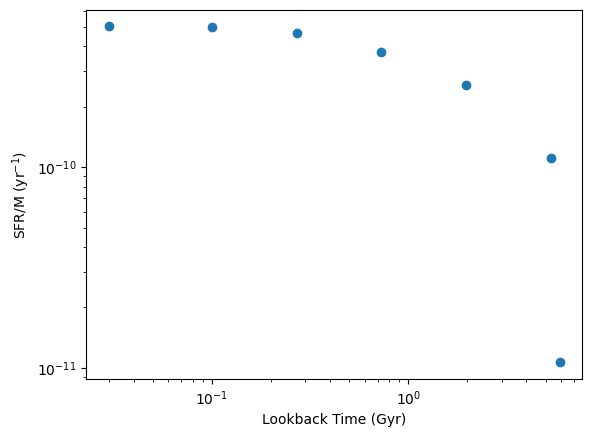

In [3]:
sigma = 0.0001
nbins = 7
redshift = 1
logmass = 9

agebins = sfh.default_agebins()
agebins_pbeta = ts.zred_to_agebins_pbeta(np.array([redshift]), agebins)

logsfrratios = pop.prospector_beta_sfh_prior(100, redshift, logmass, sigma)[0, :]

sfrs = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_pbeta)
lookback_time = (10**agebins_pbeta[:, 1])/1e9
tuniv = cosmo.get_wmap9().age(redshift)



#plotting
plt.scatter(lookback_time, sfrs/(10**logmass))
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("SFR/M (yr$^{-1}$)")

In [4]:
def sfrs_to_logsfrs_ratios(sfrs):

    logsfr_ratios_shifted = np.empty(len(sfrs)-1)
    for i in range(len(sfrs)-1):
        logsfr_ratios_shifted[i] = np.log10(sfrs[i]/sfrs[i+1])

    return logsfr_ratios_shifted

sigma = 0.3
redshift = 6
logmass = 9

agebins = sfh.default_agebins()
agebins_pbeta = sfh.zred_to_agebins_pbeta(redshift, agebins)
agebins_palpha = sfh.zred_to_agebins(redshift, agebins)

#ratios -> uniform shift in SFH
#logsfrratios = np.array([0.0, 1.0, 5.0, 1.0, -1.0, 1.0])#pop.prospector_beta_sfh_prior(100, redshift, logmass, sigma)[0, :]
#sfrs_a = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_palpha)
#sfrs_b = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_pbeta)
#sfrs_b-sfrs_a

agebin_diff = ((10**agebins_palpha-10**agebins_pbeta)/1e9)
agebin_diff


array([[ 0.        ,  0.00311558],
       [ 0.00311558,  0.04635846],
       [ 0.04635846,  0.0613042 ],
       [ 0.0613042 ,  0.06980957],
       [ 0.06980957,  0.05089918],
       [ 0.05089918, -0.04723143],
       [-0.04723143,  0.        ]])

[0.25799765 0.25799765 0.25799765 0.25799765 0.25799765 0.25799765
 0.25799765 0.25799765 0.25799765 0.25799765 0.25799765 0.25799765
 0.25799765 0.25799765]


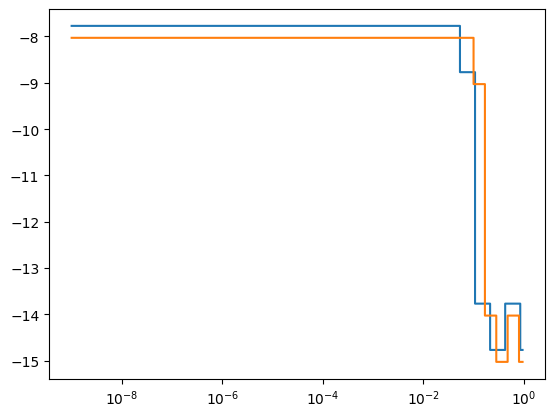

In [5]:
sigma = 0.3
redshift = 6
logmass = 9

agebins = sfh.default_agebins()
agebins_pbeta = sfh.zred_to_agebins_pbeta(redshift, agebins)
agebins_palpha = sfh.zred_to_agebins(redshift, agebins)

logsfrratios = np.array([0.0, 1.0, 5.0, 1.0, -1.0, 1.0])#pop.prospector_beta_sfh_prior(100, redshift, logmass, sigma)[0, :]

timesb, sfroutb, maxageb = sfh.continuity_sfh(agebins_pbeta, logsfrratios, 10**logmass)[0]
timesa, sfrouta, maxagea = sfh.continuity_sfh(agebins_palpha, logsfrratios, 10**logmass)[0]

tuniv = cosmo.get_wmap9().age(redshift).value

#plotting
plt.plot(tuniv-timesb, np.log10(sfroutb/(10**logmass)))
plt.plot(tuniv-timesa, np.log10(sfrouta/(10**logmass)))
plt.xscale("log")

print(np.log10(sfroutb/(10**logmass))-np.log10(sfrouta/(10**logmass)))

In [6]:
masses = ts.logsfr_ratios_to_masses(logmass, logsfrratios, agebins_pbeta)
masses_formed = np.cumsum(masses)